In [1]:
def sum_numbers(a, b):
    return a + b

In [2]:
sum_numbers(1, 2.0)

3.0

In [3]:
a = 1
b = 2.0
n_sum = sum_numbers(a, b)
print(n_sum)

3.0


In [4]:
print(f"The sum of {a} and {b} is {n_sum}")

# tweaking position, number of decimals, and notation format
print(f"The sum of {a:2d} and {b:5.4f} is {n_sum:.2E}")

The sum of 1 and 2.0 is 3.0
The sum of  1 and 2.0000 is 3.00E+00


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol as p3d
import scipy
import veloxchem as vlx

In [6]:
print(np.pi)

3.141592653589793


In [7]:
water_xyz = """3 

O       0.0000000000     0.1178336003     0.0000000000
H      -0.7595754146    -0.4713344012    -0.0000000000
H       0.7595754146    -0.4713344012     0.0000000000
"""

In [8]:
molecule = vlx.Molecule.read_xyz_string(water_xyz)

In [9]:
molecule.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
basis = vlx.MolecularBasis.read(molecule, "6-31G", ostream=None)

In [11]:
print(basis.get_string('Atomic Basis'))

               Molecular Basis (Atomic Basis)               

Basis: 6-31G                                                

  Atom Contracted GTOs           Primitive GTOs                

  O     (3S,2P)                   (10S,4P)                      
  H     (2S)                      (4S)                          

Contracted Basis Functions : 13                             
Primitive Basis Functions  : 30                             




In [12]:
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()

scf_results = scf_drv.compute(molecule, basis)

In [13]:
scf_drv?

In [14]:
help(scf_drv)

Help on ScfRestrictedDriver in module veloxchem.scfrestdriver object:

class ScfRestrictedDriver(veloxchem.scfdriver.ScfDriver)
 |  ScfRestrictedDriver(comm=None, ostream=None)
 |
 |  Implements spin restricted closed shell SCF method with C2-DIIS and
 |  two-level C2-DIIS convergence accelerators.
 |
 |  :param comm:
 |      The MPI communicator.
 |  :param ostream:
 |      The output stream.
 |
 |  Method resolution order:
 |      ScfRestrictedDriver
 |      veloxchem.scfdriver.ScfDriver
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __deepcopy__(self, memo)
 |      Implements deepcopy.
 |
 |      :param memo:
 |          The memo dictionary for deepcopy.
 |
 |      :return:
 |          A deepcopy of self.
 |
 |  __init__(self, comm=None, ostream=None)
 |      Initializes spin restricted closed shell SCF driver to default setup
 |      (convergence threshold, initial guess, etc) by calling base class
 |      constructor.
 |
 |  get_scf_type_str(self)
 |      Gets string 

In [15]:
print(scf_drv.get_scf_energy())

-75.98387037576919


In [16]:
viewer = vlx.OrbitalViewer()
viewer.plot(molecule, basis, scf_drv.mol_orbs)

Output()

Dropdown(description='Orbital:', index=4, options=(('  1 occ=2.000 ene=-20.561  (alpha HOMO-4)', 0), ('  2 occ…

In [17]:
def calc_scf(xyz, basis):
    molecule = vlx.Molecule.read_xyz_string(xyz)
    basis = vlx.MolecularBasis.read(molecule, basis, ostream=None)
    n_bas = basis.get_dimensions_of_basis()
    scf_drv = vlx.ScfRestrictedDriver()
    scf_drv.ostream.mute()
    scf_results = scf_drv.compute(molecule, basis)
    scf_energy = scf_drv.get_scf_energy()
    return scf_energy, n_bas

In [18]:
scf_energies = []
basis_size = []

In [19]:
list_example = [0.0, "Cat", np.pi, ["dog", np.e]]

In [20]:
print(list_example[0])
print(list_example[1] + " and " + list_example[3][0])

0.0
Cat and dog


In [21]:
for example in list_example:
    print(example)

0.0
Cat
3.141592653589793
['dog', 2.718281828459045]


In [22]:
basis_sets = ["STO-3G", "6-31G", "6-311G", "6-31++G**", "6-311++G**"]
for basis_set in basis_sets:
    energy_tmp, n_bas_tmp = calc_scf(water_xyz, basis_set)
    scf_energies.append(energy_tmp)
    basis_size.append(n_bas_tmp)

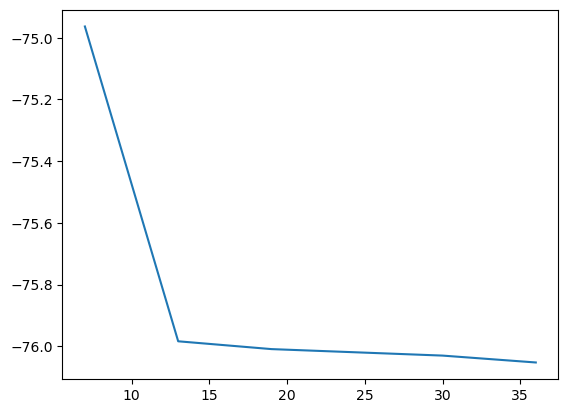

In [23]:
plt.figure()
plt.plot(basis_size, scf_energies)
plt.show()

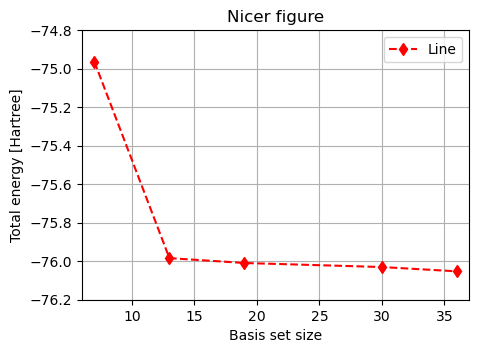

In [24]:
plt.figure(figsize=(5, 3.5)) # Tweak figure size
plt.title("Nicer figure") # Title

# plot circles at points, connected with a dashed line:
plt.plot(basis_size, scf_energies, "d--", color='red', label="Line")

plt.legend() # insert legend, using defined label
plt.xlim((6.0, 37.0)) # limits of x-axis
plt.ylim((-76.2, -74.8)) # limits of y-axis
plt.grid() # Include a grid
plt.xlabel("Basis set size")
plt.ylabel("Total energy [Hartree]")
plt.show()

In [25]:
print("np.arange:")
print(np.arange(10.0))
print(np.arange(start=1.0, stop=10.0, step=2.0))
print()
print("np.linspace:")
print(np.linspace(0.0, 10.0, 3))
print(np.linspace(start=1.0, stop=10.0, num=6))

np.arange:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 3. 5. 7. 9.]

np.linspace:
[ 0.  5. 10.]
[ 1.   2.8  4.6  6.4  8.2 10. ]


In [26]:
start_str = "John went bowling with Jane."
print(start_str)

end_str = start_str.replace("John", "Andrew")
end_str = end_str.replace("bowling", "to the cinema")
end_str = end_str.replace("Jane", "Sarah")
print(end_str)

John went bowling with Jane.
Andrew went to the cinema with Sarah.


In [27]:
co_base = """2

O       0.0       0.0       0.0
C         L       0.0       0.0
"""

bond_e = []
bond_l = np.arange(1.00, 1.40, 0.04)

for l in bond_l:
    co_tmp = co_base.replace("L", "{}".format(l))  # change C position
    energy_tmp, n_bas_tmp = calc_scf(co_tmp, "STO-3G")
    bond_e.append(energy_tmp)

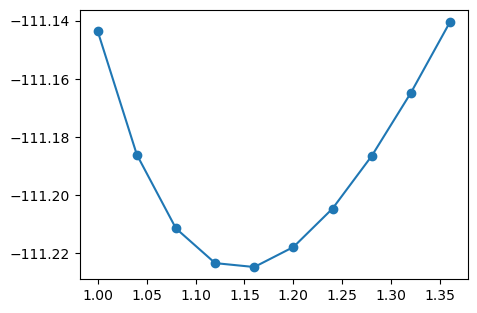

In [28]:
plt.figure(figsize=(5, 3.5))
plt.plot(bond_l, bond_e, "o-")
plt.show()

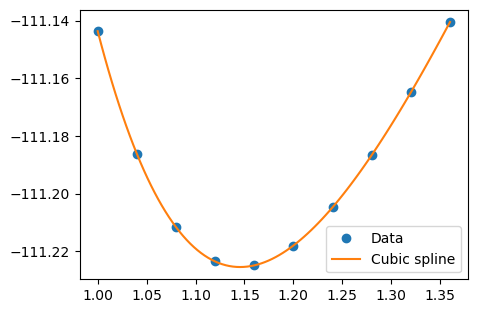

In [29]:
plt.figure(figsize=(5, 3.5))
plt.plot(bond_l, bond_e, "o")
spline_func = scipy.interpolate.interp1d(bond_l, bond_e, kind="cubic")
x_spline = np.linspace(min(bond_l), max(bond_l), 100)
y_spline = spline_func(x_spline)
plt.plot(x_spline, y_spline)
plt.legend(("Data", "Cubic spline"))
plt.show()

In [30]:
bond_e_shifted = np.array(bond_e) - min(bond_e)


def harmonic_func(l, l_0, k_s):
    return (k_s / 2.0) * (l - l_0) ** 2

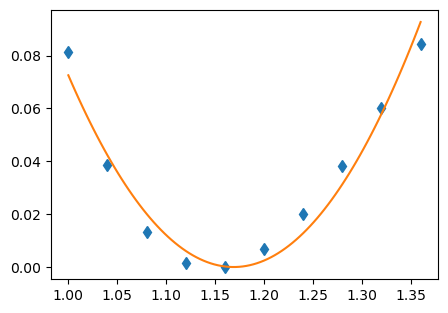

In [31]:
popt, pcov = scipy.optimize.curve_fit(harmonic_func, bond_l, bond_e_shifted)

plt.figure(figsize=(5, 3.5))
plt.plot(bond_l, bond_e_shifted, "d")
l = np.linspace(min(bond_l), max(bond_l), 100)
plt.plot(l, harmonic_func(l, *popt))
plt.show()

In [32]:
A = np.array([0, 1, 2])
B = np.array([[1, 1, 3], [3, 4, 5], [5, 6, 7]])

print("A:\n", A)
print("\nB:\n", B)
# \n adds a new line

A:
 [0 1 2]

B:
 [[1 1 3]
 [3 4 5]
 [5 6 7]]


In [33]:
print(np.einsum("i,ij->i", A, B))

[ 0 12 36]


In [34]:
print(np.einsum("i,ij->", A, B))

48


In [35]:
molecule = vlx.Molecule.read_xyz_string(water_xyz)
basis = vlx.MolecularBasis.read(molecule, "STO-3G")

In [36]:
T_ao = vlx.compute_kinetic_energy_integrals(molecule, basis)

In [37]:
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

nocc = molecule.number_of_alpha_electrons()
C = scf_results["C_alpha"]

In [38]:
orbital_energies = scf_results["E_alpha"]
print(orbital_energies)

[-20.24238972  -1.26646064  -0.61558541  -0.45278475  -0.39106556
   0.60181634   0.73720765]


In [39]:
print("Energy of occupied:\n", orbital_energies[:nocc])
print("Energy of unoccupied:\n", orbital_energies[nocc:])

Energy of occupied:
 [-20.24238972  -1.26646064  -0.61558541  -0.45278475  -0.39106556]
Energy of unoccupied:
 [0.60181634 0.73720765]


In [40]:
T_mo = np.einsum("ap, bq, ab -> pq", C, C, T_ao)

In [41]:
T_exp = 2 * np.einsum("ii", T_mo[:nocc, :nocc])
print(f"Expectation value: {T_exp:.3f} Hartree")

Expectation value: 74.579 Hartree


In [42]:
S = scf_results["S"]
print(np.around(S, 3))  # Rounding to three decimals

[[ 1.     0.237  0.053  0.053  0.     0.     0.   ]
 [ 0.237  1.     0.472  0.472  0.     0.     0.   ]
 [ 0.053  0.472  1.     0.25  -0.24   0.    -0.31 ]
 [ 0.053  0.472  0.25   1.    -0.24   0.     0.31 ]
 [ 0.     0.    -0.24  -0.24   1.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.     0.   ]
 [ 0.     0.    -0.31   0.31   0.     0.     1.   ]]


In [43]:
s, U = np.linalg.eigh(S)

print("Eigenvalues:\n", np.around(s, 3))
print()  # print empty line
print("Eigenvectors:\n", np.around(U, 3))

Eigenvalues:
 [0.345 0.42  0.886 1.    1.093 1.331 1.926]

Eigenvectors:
 [[ 0.18  -0.     0.713  0.    -0.644 -0.    -0.209]
 [-0.695  0.    -0.279  0.    -0.313 -0.    -0.584]
 [ 0.437 -0.564 -0.145  0.     0.131  0.426 -0.52 ]
 [ 0.437  0.564 -0.145 -0.     0.131 -0.426 -0.52 ]
 [ 0.321 -0.    -0.609  0.    -0.673  0.     0.27 ]
 [ 0.     0.     0.    -1.    -0.     0.    -0.   ]
 [-0.    -0.602 -0.    -0.    -0.    -0.798  0.   ]]


In [44]:
S_diag = np.matmul(np.matmul(U.T, S), U)

print(np.around(S_diag, 3))

[[ 0.345  0.    -0.    -0.    -0.    -0.    -0.   ]
 [ 0.     0.42  -0.    -0.    -0.     0.     0.   ]
 [-0.    -0.     0.886  0.     0.     0.     0.   ]
 [-0.    -0.    -0.     1.     0.     0.    -0.   ]
 [-0.    -0.     0.     0.     1.093  0.    -0.   ]
 [-0.     0.     0.     0.     0.     1.331 -0.   ]
 [-0.    -0.     0.     0.    -0.     0.     1.926]]


In [45]:
print(np.around(np.matmul(U.T, U), 5))

[[ 1. -0. -0.  0.  0. -0. -0.]
 [-0.  1.  0. -0. -0. -0.  0.]
 [-0.  0.  1. -0.  0.  0.  0.]
 [ 0. -0. -0.  1.  0.  0. -0.]
 [ 0. -0.  0.  0.  1.  0. -0.]
 [-0. -0.  0.  0.  0.  1. -0.]
 [-0.  0.  0. -0. -0. -0.  1.]]


In [46]:
print(np.around(s * np.identity(len(s)), 3))
print()
abs_diff = np.abs(s * np.identity(len(s)) - S_diag)
print(f"Summed absolute difference: {np.sum(abs_diff): .4E}")

[[0.345 0.    0.    0.    0.    0.    0.   ]
 [0.    0.42  0.    0.    0.    0.    0.   ]
 [0.    0.    0.886 0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.093 0.    0.   ]
 [0.    0.    0.    0.    0.    1.331 0.   ]
 [0.    0.    0.    0.    0.    0.    1.926]]

Summed absolute difference:  7.3097E-15


In [47]:
some_dict = {"fruit": "apple", "color": "red"}

print("Print keys:")
print(some_dict.keys())

print("\nPrint values:")
print(some_dict.values())

print("\nPrint specific value:")
print(some_dict["color"])

Print keys:
dict_keys(['fruit', 'color'])

Print values:
dict_values(['apple', 'red'])

Print specific value:
red


In [48]:
some_dict["color"] = "green"
print(some_dict.values())
print()
some_dict["freshness"] = "ripe"
print(some_dict.keys())
print()
print(some_dict.values())

dict_values(['apple', 'green'])

dict_keys(['fruit', 'color', 'freshness'])

dict_values(['apple', 'green', 'ripe'])


In [49]:
some_dict["dimensions"] = {"length": 4.5, "width": 4.3, "height": 5.2}
print(some_dict.values())

dict_values(['apple', 'green', 'ripe', {'length': 4.5, 'width': 4.3, 'height': 5.2}])


In [50]:
x = some_dict["dimensions"]
print(x)
print()
print(x.keys())
print()
print(x["width"])

{'length': 4.5, 'width': 4.3, 'height': 5.2}

dict_keys(['length', 'width', 'height'])

4.3


In [51]:
x = 5
print("Is x a string:  ", isinstance(x, str))
print("Is x an integer:", isinstance(x, int))
print("Is x a float:   ", isinstance(x, float))

Is x a string:   False
Is x an integer: True
Is x a float:    False


In [52]:
print(np.zeros((3, 2)))
print(np.ones((6)))

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[1. 1. 1. 1. 1. 1.]


In [53]:
print(f"{np.rad2deg(np.pi/4.):.2f}")
print(f"{np.deg2rad(45.):.3f}")

45.00
0.785
